In [93]:
import numpy as np
import torch
import pandas as pd

In [94]:
model_nr = 13
path = f"../lightning_logs/version_{model_nr}/"
val_predictions = torch.load(path + "val_predictions_augmented.pt")
val_targets = torch.load(path + "val_targets_augmented.pt")
val_idx = torch.load(path + "val_idx_augmented.pt")

In [95]:
torch.count_nonzero(val_targets == 1)/val_targets.shape[0]

tensor(0.0054)

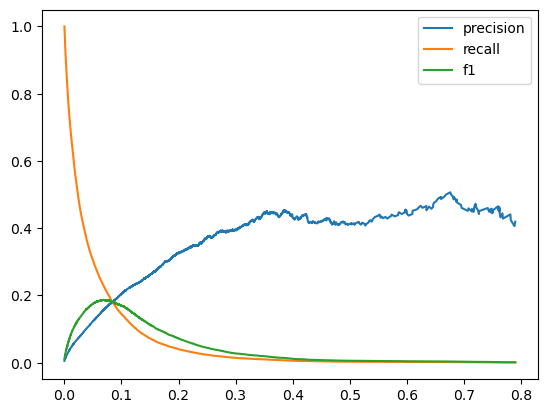

best threshold:  0.06837542
best f1 score:  0.18679138321995464
precision:  0.1570757286842822
recall:  0.2303735517379145


In [96]:
# get precision recall curve for probs_mean
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(val_targets, val_predictions)
precision = precision[:-30]
recall = recall[:-30]
thresholds = thresholds[:-30]
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
f1 = 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1])
plt.plot(thresholds, f1, label="f1")
plt.legend()
plt.show()

# print best threshold and corresponding f1 score
best_threshold = thresholds[f1.argmax()]
print("best threshold: ", best_threshold)
print("best f1 score: ", f1.max())
print("precision: ", precision[f1.argmax()])
print("recall: ", recall[f1.argmax()])

In [97]:
# make pandas dataframe with predictions and targets and idx
df = pd.DataFrame()
df["probs"] = val_predictions
df["targets"] = val_targets
df["idx"] = val_idx
df["preds"] = (val_predictions > best_threshold).type(torch.uint8)
df.head()

,probs,targets,idx,preds
0,0.000086,0.0,0.0,0
1,0.000084,0.0,0.0,0
2,0.000082,0.0,0.0,0
3,0.000080,0.0,0.0,0
4,0.000079,0.0,0.0,0


In [98]:
grouped = df.groupby("idx").sum()

In [99]:
grouped[grouped["targets"] > 0]

,probs,targets,preds
idx,,,
88.0,4.226630,2.0,0
92.0,0.748571,15.0,0
94.0,3.551468,15.0,13
103.0,0.456770,23.0,0
110.0,4.870474,8.0,12
...,...,...,...
9963.0,3.121704,5.0,0
9964.0,0.334344,15.0,0
9965.0,0.296482,2.0,0


In [100]:
from sklearn.metrics import mean_squared_error
print("MSE: ", mean_squared_error(grouped["targets"], grouped["preds"]))
print("RMSE: ", mean_squared_error(grouped["targets"], grouped["preds"], squared=False))
print("mean targets: ", grouped["targets"].mean())
print("mean preds: ", grouped["preds"].mean())

MSE:  282.5365
RMSE:  16.808822088415358
mean targets:  2.0024
mean preds:  2.9367


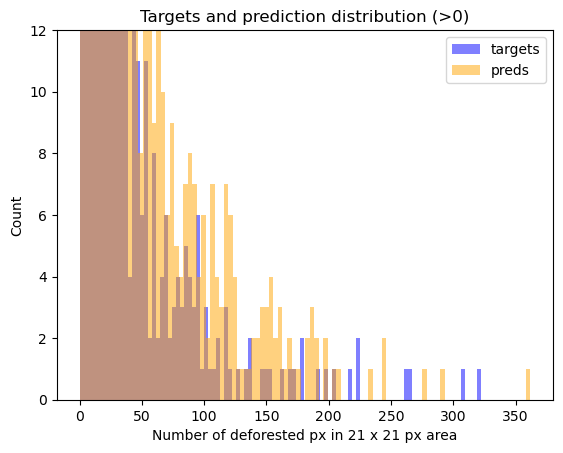

In [101]:
import matplotlib.pyplot as plt
plt.hist(grouped["targets"], bins=100, alpha=0.5, color="blue")
plt.hist(grouped["preds"], bins=100, alpha=0.5, color="orange")
plt.legend(["targets", "preds"])
plt.xlabel("Number of deforested px in 21 x 21 px area")
plt.ylabel("Count")
plt.ylim(0, 12)
plt.title("Targets and prediction distribution (>0)")
plt.show()

In [102]:
grouped["targets_one"] = grouped["targets"] > 0
grouped["preds_one"] = grouped["preds"] > 0
grouped["probs_mean"] = df.groupby("idx").mean()["probs"]
grouped["probs_max"] = df.groupby("idx").max()["probs"]

# calculate f1 score
from sklearn.metrics import f1_score, precision_score, recall_score
print("f1 score: ", f1_score(grouped["targets_one"], grouped["preds_one"]))
print("precision score: ", precision_score(grouped["targets_one"], grouped["preds_one"]))
print("recall score: ", recall_score(grouped["targets_one"], grouped["preds_one"]))

f1 score:  0.43331246086412023
precision score:  0.4046783625730994
recall score:  0.46630727762803237


In [103]:
import numpy as np
np.count_nonzero(grouped["targets_one"]) / len(grouped["targets_one"])

0.0742

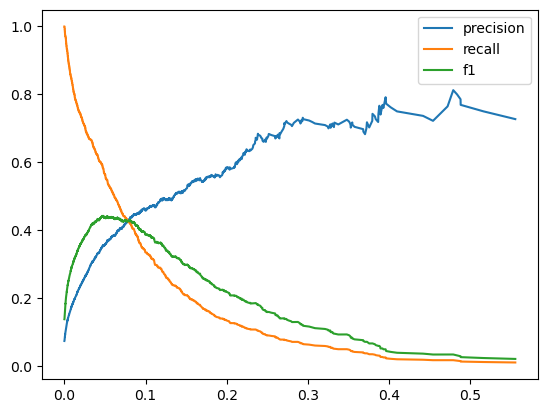

best threshold:  0.047955416
best f1 score:  0.44239631336405527
precision:  0.35672997522708505
recall:  0.5822102425876011


In [105]:
# get precision recall curve for probs_mean
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(grouped["targets_one"], grouped["probs_max"])
precision = precision[:-10]
recall = recall[:-10]
thresholds = thresholds[:-10]
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
f1 = 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1])
plt.plot(thresholds, f1, label="f1")
plt.legend()
plt.show()

# print best threshold and corresponding f1 score
best_threshold = thresholds[f1.argmax()]
print("best threshold: ", best_threshold)
print("best f1 score: ", f1.max())
print("precision: ", precision[f1.argmax()])
print("recall: ", recall[f1.argmax()])

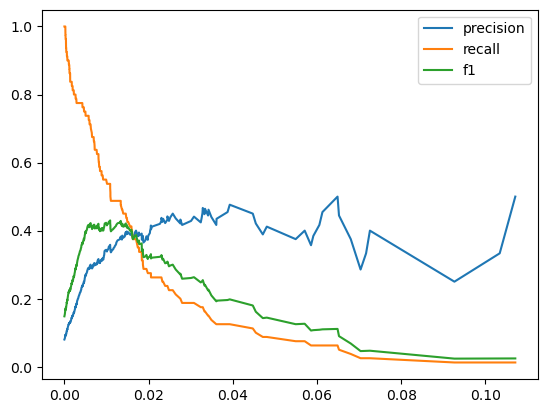

best threshold:  0.010879928
best f1 score:  0.43
precision:  0.35833333333333334
recall:  0.5375


In [90]:
# get precision recall curve for probs_mean
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(grouped["targets_one"], grouped["probs_mean"])
precision = precision[:-1]
recall = recall[:-1]
thresholds = thresholds[:-1]
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
f1 = 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1])
plt.plot(thresholds, f1, label="f1")
plt.legend()
plt.show()

# print best threshold and corresponding f1 score
best_threshold = thresholds[f1.argmax()]
print("best threshold: ", best_threshold)
print("best f1 score: ", f1.max())
print("precision: ", precision[f1.argmax()])
print("recall: ", recall[f1.argmax()])